# Finding balance and variability of constraint-based models

Here we use `flux_balance_analysis`,
`flux_variability_analysis`, and
`parsimonious_flux_balance_analysis` of `COBREXA.jl` functions to
analyze a toy model of *E. coli*.

If it is not already present, download the model.

In [1]:
!isfile("e_coli_core.xml") &&
    download("http://bigg.ucsd.edu/static/models/e_coli_core.xml", "e_coli_core.xml")

using COBREXA


model = load_model("e_coli_core.xml")

Metabolic model of type SBMLModel

⠀⠈⢀⠀⡀⠀⠀⠀⠀⡠⠂⠀⠀⠀⠀⠈⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⢀⠐⡀⠀⠀⠀⠀⠄
⠀⠐⠀⠀⠀⠀⠀⠀⡠⠂⠀⠀⠀⠀⢰⠱⣀⠀⡄⢐⠀⠀⢀⠀⠀⠀⡂⠄⠔⠁⠰⠀⠠⠀⣆⠀⠄⢠⢀⠄
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠠⠀⠀⠐⠀⠀⠀⠀⠀⠀⢀⠀⠀⠐⠀⠂⠀⠀⠀⠄⠀⠐⠀⢁⠄⠀⠀⠀⠀⠀
⠀⢀⠀⠐⡈⠀⡀⠀⠂⠀⣀⠀⠑⡈⢀⠀⠀⠀⠀⠀⡀⡠⠀⡀⠰⠁⠈⠂⠁⠀⠠⠀⠀⠂⡂⠀⠂⠂⠀⠀
⠠⠀⠐⠀⠂⠀⠀⢀⠀⠀⠀⠀⠊⠀⡐⠊⠐⠀⠀⠀⠀⠀⠐⠀⠂⠀⠀⠐⠀⠀⠀⠀⠀⠁⠃⠠⠀⠁⠐⠀
⠀⠠⠀⡀⠄⠀⠀⠂⠀⠀⠀⠠⠀⠠⠀⠀⠄⠀⠨⠀⠀⠀⠐⠀⠀⠄⢀⠀⠀⠀⠈⠀⠀⠀⠁⠄⠀⠀⠀⠀
⠀⢐⠐⠀⠄⠀⡂⠀⢐⠀⠀⠀⠀⠂⢀⢀⠐⠂⡀⠈⠀⠀⠀⠂⠀⠈⠀⡀⡐⠀⢄⠀⢀⠀⡆⠀⡀⣀⡀⡐
⠀⠈⠀⠀⠀⠀⠀⠐⢂⠀⢀⠀⠈⠀⠀⠀⠀⠀⠠⠀⠀⠠⠀⠀⠀⠈⠂⠀⠀⠀⠄⠐⠐⠀⠁⠀⠀⠑⠁⠀
⠂⠠⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠠⠈⠀⠀⠀⠀⠀⠁⠀⠀⠠⠐⠀⠁⠈⠀⠁⢀⠀⠀⠀⠀⠀⠀⠀⠀⠌⠀
⠀⠀⠂⢨⠀⡀⠀⠐⠁⠐⠀⠐⠊⠀⠀⠀⠀⠀⠀⠀⠀⠀⠢⠒⠈⠐⠐⠁⠂⠀⠀⠀⠄⠓⠕⠂⠃⠁⠀⠐
⠠⠀⠨⠀⠁⠤⠄⠀⠁⡄⠀⠂⠠⠄⢈⠌⠠⠄⠀⢀⠀⠀⠀⠄⠨⠀⡤⠀⢀⠀⢀⠠⠀⠁⡔⠨⠀⠈⠄⠀
⠀⢀⢀⣀⠀⡠⡒⢀⢀⣀⠀⢀⣀⡀⢀⠀⢀⠀⡀⠀⡀⠀⠈⣀⠀⢀⣀⠀⡀⠀⢀⠁⢀⣀⣀⡀⡠⡀⡀⣀
⠀⠄⠀⠀⠀⠀⠀⠀⠀⠂⠁⠀⠀⠀⠀⠀⠀⣠⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠐⠀⠀⠀⠀
⢀⠂⠀⠀⠂⠀⠈⠀⠐⠀⠀⠀⠁⠀⠀⠀⡀⠔⠑⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠢⠀⠀⡀⠂⠈⠀⠀⠀⠄
⠀⠐⠀⠀⡂⠀⠂⠀⠀⠀⠒⠐⠄⠂⠐⠀⠘⡀⠀⠠⡂⠃⠀⠂⠄⠂⠀⠀⠀⠀⡀⠀⡀⠀⡂⠂⠀⠀⢀⠀
Number of reactions: 95
Number of metabolites: 72


## Optimization solvers in `COBREXA`

To actually perform any optimization based analysis we need to load an
optimizer. Any [`JuMP.jl`-supported
optimizers](https://jump.dev/JuMP.jl/stable/installation/#Supported-solvers)
will work. Here, we will use [`Tulip.jl`](https://github.com/ds4dm/Tulip.jl)
to optimize linear programs and
[`OSQP.jl`](https://osqp.org/docs/get_started/julia.html) to optimize quadratic
programs.

In [2]:
using Tulip, OSQP

## Flux balance analysis (FBA)

Most analysis functions come in several variants that produce different types
of output. All of them usually require a model and `JuMP.jl`-compatible
optimizer to work in the model.

In the case of FBA, you may choose from these variants (here using the
`Tulip` optimizer):

In [3]:
vec_soln = flux_balance_analysis_vec(model, Tulip.Optimizer)

95-element Vector{Float64}:
  -0.0
   6.00724956649032
   7.477381918907127
  -5.064375360152338
   0.2234617471432185
  -3.214895030387032
   2.504309432010867
  21.799492758475754
   4.959985078874371
   1.496983802869297
   ⋮
   3.375438217960911e-7
  29.175827202685298
   9.054357964341115e-9
   4.817965631705414e-8
   9.959461594581987e-9
 -21.799492758475754
  -0.0
  -1.4340676616267298e-9
   3.214895030387032

In [4]:
dict_soln = flux_balance_analysis_dict(model, Tulip.Optimizer)

Dict{String, Float64} with 95 entries:
  "R_EX_fum_e"    => -0.0
  "R_ACONTb"      => 6.00725
  "R_TPI"         => 7.47738
  "R_SUCOAS"      => -5.06438
  "R_GLNS"        => 0.223462
  "R_EX_pi_e"     => -3.2149
  "R_PPC"         => 2.50431
  "R_O2t"         => 21.7995
  "R_G6PDH2r"     => 4.95999
  "R_TALA"        => 1.49698
  "R_PPCK"        => 5.88317e-8
  "R_EX_lac__D_e" => 2.39394e-9
  "R_PGL"         => 4.95999
  "R_H2Ot"        => -29.1758
  "R_GLNabc"      => -0.0
  "R_EX_co2_e"    => 22.8098
  "R_EX_gln__L_e" => -0.0
  "R_EX_nh4_e"    => -4.76532
  "R_MALt2_2"     => -0.0
  ⋮               => ⋮

## Modifications

Often it is desirable to add a slight modififaction to the problem before
performing analysis, to see e.g. differences of the model behavior caused by
the change introduced.

`COBREXA.jl` supports several modifications by default, which include
changing objective sense, optimizer attributes, flux constraints,
optimization objective, reaction and gene knockouts, and others.

In [5]:
dict_soln = flux_balance_analysis_dict(
    model,
    OSQP.Optimizer;
    modifications = [ # modifications are applied in order
        # this changes the objective to maximize the biomass production
        change_objective("R_BIOMASS_Ecoli_core_w_GAM"),

        # this fixes a specific rate of the glucose exchange
        change_constraint("R_EX_glc__D_e"; lb = -12, ub = -12),

        # this knocks out two genes, i.e. constrains their associated reactions to zero.
        knockout(["b0978", "b0734"]), ## the gene IDs are cytochrome oxidase (CYTBD)

        # ignore the optimizer specified above and change it to Tulip
        change_optimizer(Tulip.Optimizer),

        # set a custom attribute of the Tulip optimizer (see Tulip docs for more possibilities)
        change_optimizer_attribute("IPM_IterationsLimit", 110),

        # explicitly tell the optimizer to maximize the new objective
        change_sense(MAX_SENSE),
    ],
)

Dict{String, Float64} with 95 entries:
  "R_EX_fum_e"    => -0.0
  "R_ACONTb"      => 7.03277
  "R_TPI"         => 8.90908
  "R_SUCOAS"      => -5.8921
  "R_GLNS"        => 0.270339
  "R_EX_pi_e"     => -3.88931
  "R_PPC"         => 3.02966
  "R_O2t"         => 25.7859
  "R_G6PDH2r"     => 6.11782
  "R_TALA"        => 1.85013
  "R_PPCK"        => 5.26409e-10
  "R_EX_lac__D_e" => 4.37341e-12
  "R_PGL"         => 6.11782
  "R_H2Ot"        => -34.7096
  "R_GLNabc"      => -0.0
  "R_EX_co2_e"    => 27.0082
  "R_EX_gln__L_e" => -0.0
  "R_EX_nh4_e"    => -5.76498
  "R_MALt2_2"     => -0.0
  ⋮               => ⋮

This solution can be display using `flux_summary`. Note, this pretty printing only works
on flux solutions that are represented as dictionaries.

In [6]:
flux_summary(dict_soln)

Biomass
  R_BIOMASS_Ecoli_core_w_GAM: 1.0573
Import
  R_EX_o2_e:                  -25.7859
  R_EX_glc__D_e:              -12.0
  R_EX_nh4_e:                 -5.765
  R_EX_pi_e:                  -3.8893
Export
  R_EX_h_e:                   21.2085
  R_EX_co2_e:                 27.0082
  R_EX_h2o_e:                 34.7096


## Flux variability analysis (FVA)

The default FVA in `flux_variability_analysis` returns maximized and
minimized reaction fluxes in a matrix. Here we use the dictionary variant in
flux_variability_analysis_dict, to show how to easily access specific fluxes
from its results.

In [7]:
fva_mins, fva_maxs = flux_variability_analysis_dict(
    model,
    Tulip.Optimizer;
    bounds = objective_bounds(0.99), # the objective function is allowed to vary by ~1% from the FBA optimum
    modifications = [
        change_optimizer_attribute("IPM_IterationsLimit", 500),
        change_constraint("R_EX_glc__D_e"; lb = -10, ub = -10),
        change_constraint("R_EX_o2_e"; lb = 0.0, ub = 0.0),
    ],
)

(Dict("R_EX_fum_e" => Dict("R_EX_fum_e" => -0.0, "R_ACONTb" => 0.23975681246428646, "R_TPI" => 9.758987664410151, "R_SUCOAS" => -0.0032176953711697304, "R_GLNS" => 0.060200571606221165, "R_EX_pi_e" => -0.7710723486676665, "R_PPC" => 0.648511462789616, "R_O2t" => 4.7620907185810674e-17, "R_G6PDH2r" => 0.09755599563531388, "R_TALA" => -0.004979593188388901…), "R_ACONTb" => Dict("R_EX_fum_e" => -0.0, "R_ACONTb" => 0.22607952399025047, "R_TPI" => 9.751315002264594, "R_SUCOAS" => -5.7476116849648756e-11, "R_GLNS" => 0.062181345572819555, "R_EX_pi_e" => -0.7708580440964182, "R_PPC" => 0.6578793157880826, "R_O2t" => 9.410658208197004e-15, "R_G6PDH2r" => 0.1207478223560313, "R_TALA" => 0.002761437630187624…), "R_TPI" => Dict("R_EX_fum_e" => -0.0, "R_ACONTb" => 0.22607952434490422, "R_TPI" => 9.485804104911805, "R_SUCOAS" => -8.335641656995056e-11, "R_GLNS" => 0.053580994933664666, "R_EX_pi_e" => -0.7708580445468374, "R_PPC" => 0.6004759354089005, "R_O2t" => 5.507347171694764e-15, "R_G6PDH2r" =

In [8]:
fva_maxs["R_EX_ac_e"]["R_EX_ac_e"] # get the maximal acetate exchange flux

8.518549434877563

Another option is to display this information using `flux_variability_summary`. This
pretty printing only works on flux variability analysis results where dictionary keys indicate
which flux is optimized and the associated value is a flux dictionary.

In [9]:
flux_variability_summary((fva_mins, fva_maxs))

Biomass                       Lower bound   Upper bound
  R_BIOMASS_Ecoli_core_w_GAM: 0.2095        0.2095
Exchange
  R_EX_h_e:                   28.2555       30.7398
  R_EX_for_e:                 16.2978       17.8266
  R_EX_glc__D_e:              -10.0         -10.0
  R_EX_etoh_e:                8.0419        9.0611
  R_EX_ac_e:                  7.4484        8.5185
  R_EX_h2o_e:                 -7.1446       -6.3802
  R_EX_nh4_e:                 -1.2063       -1.1426
  R_EX_co2_e:                 -0.5655       1.1544
  R_EX_pi_e:                  -0.7786       -0.7709
  R_EX_lac__D_e:              0.0           0.5096
  R_EX_acald_e:               0.0           0.3058
  R_EX_pyr_e:                 0.0           0.2548
  R_EX_succ_e:                0.0           0.1911
  R_EX_akg_e:                 0.0           0.0665
  R_EX_glu__L_e:              0.0           0.0637
  R_EX_fum_e:                 -0.0          -0.0
  R_EX_mal__L_e:              -0.0          -0.0
  R_EX_gln__L_e: 

More sophisticated variants of `flux_variability_analysis` can be used to extract
specific pieces of information from the solved optimization problems. Here the objective
value of the minimized flux and the associated biomass growth rate is returned instead
of every flux.

In [10]:
biomass_idx = first(indexin(["R_BIOMASS_Ecoli_core_w_GAM"], reactions(model))) # index of biomass function
vs = flux_variability_analysis(
    model,
    Tulip.Optimizer;
    bounds = objective_bounds(0.50), # biomass can vary up to 50% less than optimum
    modifications = [
        change_optimizer_attribute("IPM_IterationsLimit", 500),
        change_constraint("R_EX_glc__D_e"; lb = -10, ub = -10),
        change_constraint("R_EX_o2_e"; lb = 0.0, ub = 0.0),
    ],
    ret = m ->
        (COBREXA.JuMP.objective_value(m), COBREXA.JuMP.value(m[:x][biomass_idx])), # m is the model and m[:x] extracts the fluxes from the model
)

95×2 Matrix{Tuple{Float64, Float64}}:
 (0.0, 0.112692)           (-0.0, 0.112692)
 (0.114182, 0.105831)      (3.4504, 0.105831)
 (7.25136, 0.105831)       (9.89473, 0.105831)
 (-3.08393, 0.105831)      (-1.29492e-11, 0.112787)
 (0.0270611, 0.105831)     (9.58206, 0.105831)
 (-0.778644, 0.211663)     (-0.389322, 0.105831)
 (0.303271, 0.105831)      (10.7656, 0.105831)
 (-5.49068e-18, 0.112692)  (-5.53641e-18, 0.112692)
 (4.67779e-13, 0.112782)   (7.93011, 0.105831)
 (-0.0378665, 0.211663)    (2.62444, 0.105831)
 ⋮                         
 (3.0129e-11, 0.112701)    (20.9246, 0.105831)
 (-8.5579, 0.105831)       (5.65485, 0.105831)
 (3.50341e-11, 0.112866)   (9.555, 0.105831)
 (1.5999e-11, 0.112882)    (9.37857, 0.105831)
 (6.05059e-11, 0.112888)   (9.555, 0.105831)
 (0.0, 0.112692)           (-0.0, 0.112692)
 (0.0, 0.112692)           (-0.0, 0.112692)
 (-18.3915, 0.105831)      (-1.59455e-11, 0.107865)
 (0.389322, 0.105831)      (0.778644, 0.211663)

In [11]:
fva_mins = Dict(rxn => flux for (rxn, flux) in zip(reactions(model), vs[:, 1]))

Dict{String, Tuple{Float64, Float64}} with 95 entries:
  "R_EX_fum_e"    => (0.0, 0.112692)
  "R_ACONTb"      => (0.114182, 0.105831)
  "R_TPI"         => (7.25136, 0.105831)
  "R_SUCOAS"      => (-3.08393, 0.105831)
  "R_GLNS"        => (0.0270611, 0.105831)
  "R_EX_pi_e"     => (-0.778644, 0.211663)
  "R_PPC"         => (0.303271, 0.105831)
  "R_O2t"         => (-5.49068e-18, 0.112692)
  "R_G6PDH2r"     => (4.67779e-13, 0.112782)
  "R_TALA"        => (-0.0378665, 0.211663)
  "R_PPCK"        => (1.41777e-11, 0.112871)
  "R_EX_lac__D_e" => (6.27487e-11, 0.11313)
  "R_PGL"         => (4.67543e-13, 0.112782)
  "R_H2Ot"        => (-5.65485, 0.105831)
  "R_GLNabc"      => (0.0, 0.112692)
  "R_EX_co2_e"    => (-9.38627, 0.105831)
  "R_EX_gln__L_e" => (0.0, 0.112692)
  "R_EX_nh4_e"    => (-3.76208, 0.105831)
  "R_MALt2_2"     => (0.0, 0.112692)
  ⋮               => ⋮

## Parsimonious flux balance analysis (pFBA)

Parsimonious flux balance analysis (here in
`parsimonious_flux_balance_analysis` finds a unique flux solution
that minimizes the squared sum of fluxes of the system subject, while
maintaining the same objective value as the flux balance analysis solution.
Since we are optimizing a quadratic objective, we also need to switch to a
quadratic optimizer. In this case, OSQP will work. We demonstrate it on the
dictionary-returning variant of pFBA,
`parsimonious_flux_balance_analysis_dict`:

In [12]:
dict_soln = parsimonious_flux_balance_analysis_dict(
    model,
    OSQP.Optimizer;
    modifications = [
        silence, # silence the optimizer (OSQP is very verbose by default)
        change_constraint("R_EX_glc__D_e"; lb = -12, ub = -12),
    ],
)

Dict{String, Float64} with 95 entries:
  "R_EX_fum_e"    => -0.0054306
  "R_ACONTb"      => 6.51108
  "R_TPI"         => 8.90211
  "R_SUCOAS"      => -5.41568
  "R_GLNS"        => 0.250914
  "R_EX_pi_e"     => -3.85013
  "R_PPC"         => 2.94799
  "R_O2t"         => 25.1823
  "R_G6PDH2r"     => 6.27109
  "R_TALA"        => 1.90314
  "R_PPCK"        => -0.00186526
  "R_EX_lac__D_e" => -0.00399055
  "R_PGL"         => 6.27111
  "R_H2Ot"        => -33.9472
  "R_GLNabc"      => 0.0126618
  "R_EX_co2_e"    => 26.4219
  "R_EX_gln__L_e" => -0.0126492
  "R_EX_nh4_e"    => -5.67116
  "R_MALt2_2"     => 0.00493596
  ⋮               => ⋮

The function also has the expectable second variant that returns a vector of
solutions, in `parsimonious_flux_balance_analysis_vec`. Here, we
utilize it to show how to use different optimizers for finding the optimum
and for solving the quadratic problem. That may be preferable if the
optimizer qualities differ for the differing tasks. pFBA allows you to
specify `qp_modifications` that are applied after the original optimum is
found, and before the quadratic part of the problem solving begins.

In [13]:
vec_soln = parsimonious_flux_balance_analysis_vec(
    model,
    Tulip.Optimizer; # start with Tulip
    modifications = [
        change_constraint("R_EX_glc__D_e"; lb = -12, ub = -12),
        change_optimizer_attribute("IPM_IterationsLimit", 500), # we may change Tulip-specific attributes here
    ],
    qp_modifications = [
        change_optimizer(OSQP.Optimizer), # now switch to OSQP (Tulip wouldn't be able to finish the computation)
        silence, # and make it quiet.
    ],
)

95-element Vector{Float64}:
  -0.006231402533094581
   6.847122967587614
   8.914435875871503
  -5.738183656745528
   0.25363156710733
  -3.8887743417980833
   2.977310372502161
  25.64208341306474
   6.1991009754149715
   1.877264043236841
   ⋮
  -0.0002197051126034427
  34.49592944330335
  -0.0020752886988600542
  -0.0014018715428246171
  -0.002009900868927077
 -25.642083259145206
   0.0161569956400718
   0.004729690379188246
   3.8887743479784547

## Flux balance analysis with molecular crowding (FBAwMC)

Flux balance with molecular crowding incorporates enzyme capacity constraints into the
classic flux balance analysis algorithm. Essentially, an extra constraint is added to
the optimization problem: `∑ wᵢ × vᵢ ≤ 1` where `wᵢ` weights each internal flux `vᵢ`. See
`Beg, Qasim K., et al. "Intracellular crowding defines the mode and sequence of
substrate uptake by Escherichia coli and constrains its metabolic activity." Proceedings of
the National Academy of Sciences 104.31 (2007): 12663-12668.` for more details.

First load the model

In [14]:
model = load_model("e_coli_core.json")

Metabolic model of type JSONModel

⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢄⠀⠀⠀⠀⠀⠀⠀⠈⠶⠴⡆⠀⠀⠀⠀⠀⠀
⡀⢐⣀⢀⡀⡒⢒⣐⠀⣂⣂⠀⣂⣂⢂⠀⢀⠀⠀⠀⠀⠀⢀⠄⠀⠀⠀⢂⠀⢂⣀⣐⡒⡀⠆⢙⣀⠀⡀⠀
⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠰⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠈⢑⣀⣀⠀⠀
⠀⠀⠃⠀⠃⠀⠀⠀⠘⠀⡇⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⡜⠀⡄⣤⢠⠘⠙⢣⡇⠘
⠀⠐⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠀⠀⠀⠀⠐⠁⠉⠀⠀⠀⠀⠀⠘⠄
⠀⢐⠀⠂⠀⠄⠠⠠⠀⠠⠆⠀⠄⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠠⠀⠠⠀⠀⢀⠀⠀⠠⠀⠀⠁
⢀⠐⠀⠨⢀⠁⠈⣈⠀⢁⣁⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠄⠀⠁⢀⠀⢊⠉⠀⠀⠀⢀⠀⣀⠀⢀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡈⠀⡀⠆⠀⠆⠀⡀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠆⠀
⠀⠀⠂⠀⡂⠀⠀⠁⠀⠀⠀⠈⠁⠀⠀⠀⠄⠄⢁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀
⠈⠀⠁⠀⠀⢀⡀⠀⠠⠁⠁⠀⠑⠀⠐⠲⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠂⠀⠂⠀⠀⠀⠀⠀⠀⠊⠀⠀⠀⠈
⠄⠠⢠⠀⠰⠀⠠⠀⠤⠦⠄⠈⠀⠀⠀⠠⠀⠁⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠤⠄⠄⠠⠀⠀⠀⠀⠀
⠂⠐⠀⠀⠐⡠⢐⠘⢃⠒⠂⡀⠄⠀⠀⠐⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠒⠀⢀⢀⠀⠀⣀⠀⢀
⠈⠀⠁⠀⡀⠀⠀⠀⠈⠁⠅⠀⠁⠀⢀⠈⠄⠔⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠈
⠣⠁⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠈⠀⠁⠁⠀⠈⡀⠀⠀⠀⠀⠀⠐⢣⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⡄⠀⠀⠀⠀⠂⠄⠤⠀⠀⠈⠂⠀⠀⠀⠀⠠⠀⠊⠒⣠⠀⠀⠀⠀⠀⠀⠀⠀⠀
Number of reactions: 95
Number of metabolites: 72


Next, simulate the model over a range of substrate uptake rates.

In [15]:
without_crowding = Dict{Float64,Vector{Float64}}()
with_crowding = Dict{Float64,Vector{Float64}}()
glucose_uptakes = collect(-(1.0:0.5:20))

for glc in glucose_uptakes
    no_crowding = flux_balance_analysis_dict( # classic FBA
        model,
        Tulip.Optimizer;
        modifications = [
            change_optimizer_attribute("IPM_IterationsLimit", 1000),
            change_constraint("EX_glc__D_e"; lb = glc),
        ],
    )

    without_crowding[glc] =
        [no_crowding["BIOMASS_Ecoli_core_w_GAM"], no_crowding["EX_ac_e"]]

    crowding = flux_balance_analysis_dict( # FBAwMC
        model,
        Tulip.Optimizer;
        modifications = [
            change_optimizer_attribute("IPM_IterationsLimit", 1000),
            add_crowding_constraint(0.004), # crowding constraint gets added here
            change_constraint("EX_glc__D_e"; lb = glc),
        ],
    )

    with_crowding[glc] = [crowding["BIOMASS_Ecoli_core_w_GAM"], crowding["EX_ac_e"]]
end

Finally, plot the results to compare classic FBA with FBAwMC.

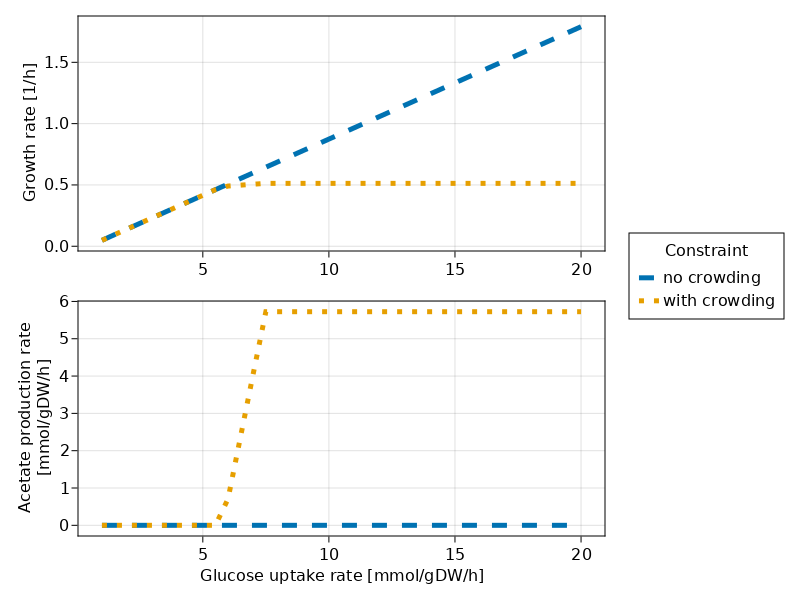

In [16]:
using CairoMakie
fig = Figure();
ax1 = Axis(fig[1, 1]);
lines!(
    ax1,
    -glucose_uptakes,
    [without_crowding[glc][1] for glc in glucose_uptakes],
    label = "no crowding",
    linewidth = 5,
    linestyle = :dash,
)
lines!(
    ax1,
    -glucose_uptakes,
    [with_crowding[glc][1] for glc in glucose_uptakes],
    label = "with crowding",
    linewidth = 5,
    linestyle = :dot,
)
ax1.ylabel = "Growth rate [1/h]"
ax2 = Axis(fig[2, 1])
lines!(
    ax2,
    -glucose_uptakes,
    [without_crowding[glc][2] for glc in glucose_uptakes],
    label = "no crowding",
    linewidth = 5,
    linestyle = :dash,
)
lines!(
    ax2,
    -glucose_uptakes,
    [with_crowding[glc][2] for glc in glucose_uptakes],
    label = "with crowding",
    linewidth = 5,
    linestyle = :dot,
)
fig[1:2, 2] = Legend(fig, ax1, "Constraint")
ax2.xlabel = "Glucose uptake rate [mmol/gDW/h]"
ax2.ylabel = "Acetate production rate\n[mmol/gDW/h]"
fig

Notice that overflow metabolism is modeled by incorporating the crowding constraint.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*